In [135]:
import pandas as pd
from utils import plot_top_channels, prepare_data_for_folium, make_plotly_map
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


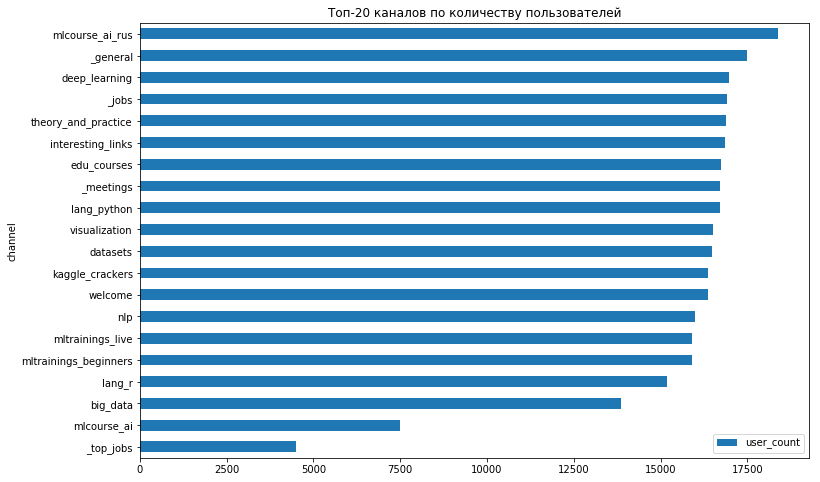

In [8]:
plot_top_channels()

In [9]:
plot_top_channels(plot_type='plotly', top_n=None)

In [20]:
#df = prepare_data_for_folium(return_df=True)

## working with data
df - data with geo from tz, so it isn't really accurate

In [23]:
df = pd.read_csv('2.csv')

In [29]:
df = df.rename(columns={'users': 'user_count'})

In [31]:
folium_map = make_plotly_map(df)

In [32]:
folium_map

### a better file
Now data from Alexander with locations which users entered while registering.

In [149]:
df1 = pd.read_csv('shared/user_locations_osm.csv')

In [150]:
df1.head()

,city,user,latitude,longitude
0,Москва,y.nasibullina,55.750718,37.617661
1,Москва,kirkudiv,55.750718,37.617661
2,Moscow,avkuliev,55.750718,37.617661
3,Краснодар,btlart,45.035257,38.976481
4,Samara,spetras7,53.198627,50.113987


In [151]:
df1.shape

(16124, 4)

### fixing data

In [152]:
# drop unread cities
df1 = df1.loc[df1['city'].isna() == False]

In [153]:
df1.shape

(15875, 4)

In [154]:
# drop non read geo
df1 = df1.loc[df1['latitude'] != 0]
df1.shape

(14073, 4)

In [157]:
# fix None users.
df1['user'] = df1['user'].astype(str)

In [158]:
df1['user_count_city'] = df1.groupby('city')['user'].transform('count')

In [160]:
# more than half of cities have 1 occurence. drop them
df1 = df1.loc[df1['user_count_city'] > 1]

There are many cases when users entered city names in different ways, let's fix them:
take a first latitue/longtitude and assign to all these lines.

In [161]:
lat1 = df1.loc[df1.city.str.contains('San Francisco'), 'latitude'].values[0]
lon1 = df1.loc[df1.city.str.contains('San Francisco'), 'longitude'].values[0]
df1.loc[df1.city.str.contains('San Francisco'), 'latitude'] = lat1
df1.loc[df1.city.str.contains('San Francisco'), 'longitude'] = lon1

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [162]:
lat1 = df1.loc[df1.city == 'Москва', 'latitude'].values[0]
lon1 = df1.loc[df1.city == 'Москва', 'longitude'].values[0]
df1.loc[df1.city == 'Moscow', 'latitude'] = lat1
df1.loc[df1.city == 'Moscow', 'longitude'] = lon1

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [163]:
lat1 = df1.loc[df1.city.str.contains('DC'), 'latitude'].values[0]
lon1 = df1.loc[df1.city.str.contains('DC'), 'longitude'].values[0]
df1.loc[df1.city.str.contains('DC'), 'latitude'] = lat1
df1.loc[df1.city.str.contains('DC'), 'longitude'] = lon1

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [164]:
# comparing values
pd.merge(df1, df, on='user')[['user', 'city_x', 'city_y']].head()

,user,city_x,city_y
0,kirkudiv,Москва,Moscow
1,avkuliev,Moscow,Moscow
2,btlart,Краснодар,Moscow
3,spetras7,Samara,Moscow
4,spetras7,Samara,Moscow


In [165]:
df1['user_count_lat'] = df1.groupby('latitude')['user'].transform('count')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [124]:
m = folium.Map([], zoom_start=30)
geo_matrix = u_c_df[['latitude', 'longitude']].values
m.add_child(plugins.HeatMap(geo_matrix, radius=15));

marker_cluster = plugins.MarkerCluster().add_to(m)

for c in u_c_df.latitude.unique():
    c = u_c_df.loc[u_c_df['latitude'] == c, 'city'].unique()[0]
    city_users = list(u_c_df.loc[u_c_df['city'] == c, 'user'].values)[:5]
    city_users = '\n'.join(city_users)
    user_count = u_c_df.loc[u_c_df['city'] == c, 'user_count1'].unique()[0]
    folium.Marker(location=[u_c_df.loc[u_c_df['city'] == c, 'latitude'].unique()[0],
                            u_c_df.loc[u_c_df['city'] == c, 'longitude'].unique()[0]],
                        popup=f'''Город: {c}<br>
                                  Количество пользователей: {user_count}<br>
                                  Здесь живут такие люди: {city_users}'''
                       ).add_to(marker_cluster)

In [174]:
df1.head()

,city,user,latitude,longitude,user_count_city,user_count_lat
0,Москва,y.nasibullina,55.750718,37.617661,5344,6350
1,Москва,kirkudiv,55.750718,37.617661,5344,6350
2,Moscow,avkuliev,55.750718,37.617661,840,6350
3,Краснодар,btlart,45.035257,38.976481,63,79
4,Samara,spetras7,53.198627,50.113987,20,131


In [167]:
folium_map1 = make_plotly_map(df1, plot_by='geo')

In [168]:
folium_map1

In [170]:
folium_map1.save('big_map_latest.html')

In [213]:
folium_map1 = make_plotly_map(df1, plot_by='geo')

In [214]:
folium_map1

In [215]:
folium_map1.save('big_map_latest_upd.html')